# Machine Learning 2023-2024 - UMONS

# Principal Component Analysis

In this lab, we'll see in practice how to use Principal Component Analysis (PCA) to reduce the dimensionality of a dataset, and how to interpret the principal components. To this end, we'll use the "Wisconsin Breast Cancer dataset", which contains diverse characteristics of cancerous cell nuclei, and whether a patient's tumor is malignant (M) or benign (B). In the second part of the lab, we'll see how PCA can be used to compress an image. 

**Load the necessary libraries**

In [7]:
import sklearn 
import pandas as pd 
from sklearn.decomposition import PCA
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import cv2
from sklearn.preprocessing import StandardScaler

**1) Read the dataset, drop the columns 'id' and 'Unnamed : 32', and check whether there are missing values. If any, drop the entire corresponding row.**

**2) Select *diagnosis* as the target variable y, and all remaining columns in the dataframe as the predictors variables X.** 

**Standardize the matrix X column-wise. Why is standardizing important in the context of PCA ?**

**3) Compute the total variance of the centered variable X.**

**4) Apply PCA to the standardized dataset X by computing *all* principal components. Make sure you can access to the principal components, the variance explained by each component and the ratio of variance explained by each component. You'll need the `PCA` method of Scikit-learn.**

**5) Create a barplot of the proportion of total variance explained by the first 15 components. What do you observe ?**

**Generate also a barplot of the cumulative ratio of the total variance explained by the first 15 components.**

**Also, what is the proportion of the total variance explained by all the components, and how many components would you need to explain 95% of the variance?**

**6) Generate a biplot of the component's scores in the space spanned by the first two components.**  

**Color the points depending on their target label ('M' or 'B'). Do you notice anything?**

**7) Use the code below to generate a *loading table* for the first two principal components, i.e. a pandas Dataframe which columns are the principal components, and which rows are the loadings for each variable.**

**How do you interpret it?**

In [ ]:
features = X.columns
columns = ['PC1', 'PC2']
loadings = pd.DataFrame(data = np.transpose(pca.components_[0:2,:]), 
                  index = features, 
                  columns = columns)
print(loadings)

**8) Use the function below to generate a loading plot. How do you interpret it?**

In [ ]:
def myplot(score,coeff, y, labels=None, max_comp=None):
    fig, ax = plt.subplots()
    xs = score[:,0]
    ys = score[:,1]
    if max_comp is None:
        n = coeff.shape[0]
    else:
        n = max_comp
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    idx_m = y == 'M'
    idx_b = y == 'B'
    score_M = score[idx_m, :] 
    score_B = score[idx_b, :]
    ax.scatter(score_M[:,0]*scalex, score_M[:,1]*scaley, color='r', label='Malignant')
    ax.scatter(score_B[:,0]*scalex, score_B[:,1]*scaley, color='b', label='Benign')
    ax.legend()
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'black',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15 , coeff[i,1] * 1.15 , "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15 , coeff[i,1] * 1.15 , labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.5,1)
    plt.ylim(-1,1)
    ax.set_xlabel("PC{}".format(1))
    ax.set_ylabel("PC{}".format(2))
    fig.set_size_inches(18.5, 10.5)

pca = PCA()
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_sc)

myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]), y, max_comp=None)


plt.show()

**9) Create a pipeline containing a `StandardScaler`, followed by a `PCA` retaining the first 5 PCs, followed by a `LogisticRegression`.**

**Split the original dataset into a training and a test set following a 80/20 partition, fit the pipeline on the training set, and predict on the test set. Evaluate the test auroc score.**

**Compare the test results obtained with the pipeline to a simple `LogisticRegression` model. Do you notice significant differences?**

### BONUS : How to use PCA to compress images

**10) We'll now see how PCA can be employed to compress an image. First, load the 'doggo.jpeg' picture using the library matplotlib.**

(1414, 2121, 3)


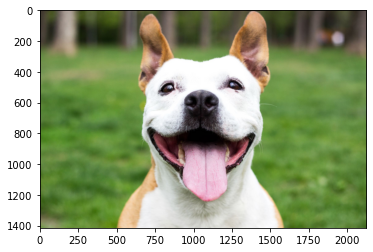

In [15]:
img = plt.imread('doggo.jpeg') 
plt.imshow(img)
print(img.shape)

**11) Split the image into its red, green and blue channels using the method cv2.split(). Then, on each channel, apply a PCA transformation with 1 component. For each channel, also compute the inverse PCA transform (using the pca.inverse_transform() method).**

**Stack the three inverted transforms (one for each channel) back together to form the compressed image, and display the image. Try by increasing the number of principal components until you reach a satisfactory quality.**

In [16]:
red, green, blue = cv2.split(img) 
#initialize PCA with first 20 principal components
pca = PCA(100)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

print(blue_transformed.shape)

(1414, 100)


In [17]:
img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)
print(img_compressed.shape)

(1414, 2121, 3)


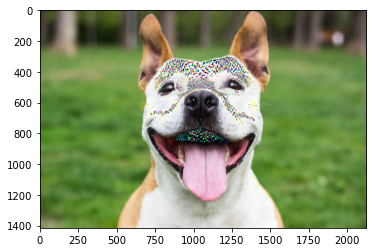

In [18]:
#viewing the compressed image
plt.imshow(img_compressed)

As we increase the number of PCs, the original image gets reconstructed better and better, up to a point at which the difference is not even distinguishable by the human eye. 